# Setup & Load the Dataset

In [ ]:
# 📦Install required packages
install.packages("tidyverse")
install.packages("lubridate")
install.packages("data.table")

In [ ]:
install.packages("timechange")

In [ ]:
# 📥Load Libraries and Import Dataset
library(tidyverse)
library(lubridate)
library(dplyr)
library(data.table)
library(ggplot2)
library(scales)

### a. Load the dataset

In [2]:
gsd <- fread("Global Superstore.csv", encoding = "UTF-8")

# 1. Dataset Exploration and Cleaning

### b.Display the first 12 rows

In [3]:
head(gsd, 12)

Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,⋯,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,MX-2014-143658,10/2/2014,10/6/2014,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,⋯,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0,4.56,1.03,Medium
2,MX-2012-155047,10/15/2012,10/20/2012,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,⋯,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0,90.72,13.45,Medium
3,MX-2012-155047,10/15/2012,10/20/2012,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,⋯,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0,54.08,9.63,Medium
4,MX-2012-155047,10/15/2012,10/20/2012,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,⋯,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0,4.96,1.37,Medium
5,MX-2012-155047,10/15/2012,10/20/2012,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,⋯,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0,11.44,3.79,Medium
6,MX-2012-155047,10/15/2012,10/20/2012,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,⋯,OFF-EN-10001375,Office Supplies,Envelopes,"GlobeWeis Mailers, with clear poly window",56.12,2,0,21.32,4.72,Medium
7,MX-2013-134096,9/27/2013,10/1/2013,Standard Class,DP-13000,Darren Powers,Consumer,São Paulo,São Paulo,⋯,OFF-EN-10001375,Office Supplies,Envelopes,"GlobeWeis Mailers, with clear poly window",56.12,2,0,21.32,4.11,Medium
8,MX-2013-134096,9/27/2013,10/1/2013,Standard Class,DP-13000,Darren Powers,Consumer,São Paulo,São Paulo,⋯,TEC-MA-10004956,Technology,Machines,"Konica Card Printer, Red",344.64,3,0,165.42,26.20,Medium
9,MX-2013-134096,9/27/2013,10/1/2013,Standard Class,DP-13000,Darren Powers,Consumer,São Paulo,São Paulo,⋯,OFF-SU-10003474,Office Supplies,Supplies,"Elite Box Cutter, Easy Grip",97.36,4,0,19.44,6.86,Medium


### c. Display the last 5 rows

In [4]:
tail(gsd, 5)

Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,⋯,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
51286,HU-2012-7730,9/5/2012,9/7/2012,First Class,NF-8385,Natalie Fritzler,Consumer,Budapest,Budapest,⋯,OFF-AVE-10004570,Office Supplies,Binders,"Avery Binder Covers, Economy",11.07,1,0,3.42,1.98,High
51287,HU-2012-7730,9/5/2012,9/7/2012,First Class,NF-8385,Natalie Fritzler,Consumer,Budapest,Budapest,⋯,TEC-LOG-10004419,Technology,Accessories,"Logitech Flash Drive, USB",61.44,2,0,18.42,13.02,High
51288,HU-2012-7730,9/5/2012,9/7/2012,First Class,NF-8385,Natalie Fritzler,Consumer,Budapest,Budapest,⋯,OFF-BOS-10002705,Office Supplies,Art,"Boston Highlighters, Fluorescent",80.52,4,0,20.88,8.78,High
51289,HU-2012-7730,9/5/2012,9/7/2012,First Class,NF-8385,Natalie Fritzler,Consumer,Budapest,Budapest,⋯,OFF-ENE-10004132,Office Supplies,Paper,"Enermax Computer Printout Paper, 8.5 x 11",130.44,4,0,33.84,18.97,High
51290,IZ-2011-5750,8/25/2011,8/29/2011,Standard Class,SZ-10035,Sam Zeldin,Home Office,Baghdad,Baghdad,⋯,OFF-ACC-10002343,Office Supplies,Binders,"Acco 3-Hole Punch, Durable",31.62,1,0,12.96,2.40,Medium


### d. Number of variables (columns)

In [5]:
ncol(gsd)

[1] 24

### e. Number of observations (rows)

In [6]:
nrow(gsd)

[1] 51290

### f. Dimensions of the dataset

In [7]:
dim(gsd)

[1] 51290    24

dataset gsd has:

- 51,290 rows (observations)
- 24 columns (variables or features)

### g. Structure of the dataset

In [8]:
str(gsd)

Classes 'data.table' and 'data.frame':	51290 obs. of  24 variables:
 $ Row ID        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Order ID      : chr  "MX-2014-143658" "MX-2012-155047" "MX-2012-155047" "MX-2012-155047" ...
 $ Order Date    : chr  "10/2/2014" "10/15/2012" "10/15/2012" "10/15/2012" ...
 $ Ship Date     : chr  "10/6/2014" "10/20/2012" "10/20/2012" "10/20/2012" ...
 $ Ship Mode     : chr  "Standard Class" "Standard Class" "Standard Class" "Standard Class" ...
 $ Customer ID   : chr  "SC-20575" "KW-16570" "KW-16570" "KW-16570" ...
 $ Customer Name : chr  "Sonia Cooley" "Kelly Williams" "Kelly Williams" "Kelly Williams" ...
 $ Segment       : chr  "Consumer" "Consumer" "Consumer" "Consumer" ...
 $ City          : chr  "Mexico City" "Dos Quebradas" "Dos Quebradas" "Dos Quebradas" ...
 $ State         : chr  "Distrito Federal" "Risaralda" "Risaralda" "Risaralda" ...
 $ Country       : chr  "Mexico" "Colombia" "Colombia" "Colombia" ...
 $ Postal Code   : int  NA NA NA NA NA NA NA NA NA N

### h. Summary statistics and insights

In [9]:
summary(gsd)

     Row ID        Order ID          Order Date         Ship Date        
 Min.   :    1   Length:51290       Length:51290       Length:51290      
 1st Qu.:12823   Class :character   Class :character   Class :character  
 Median :25646   Mode  :character   Mode  :character   Mode  :character  
 Mean   :25646                                                           
 3rd Qu.:38468                                                           
 Max.   :51290                                                           
                                                                         
  Ship Mode         Customer ID        Customer Name        Segment         
 Length:51290       Length:51290       Length:51290       Length:51290      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                       

#### ✍️Key Insights
##### With frequency counts, histograms & boxplots

![image](images/image1.png)

#### Frequency Counts

In [10]:
# Purpose: To understand the distribution of categories within a variable.
table(gsd$Segment)
table(gsd$'Ship Mode')
table(gsd$Region)
table(gsd$'Order Priority')


   Consumer   Corporate Home Office 
      26518       15429        9343 


   First Class       Same Day   Second Class Standard Class 
          7505           2701          10309          30775 


        Africa         Canada      Caribbean        Central   Central Asia 
          4587            384           1690          11117           2048 
          East           EMEA          North     North Asia        Oceania 
          2848           5029           4785           2338           3487 
         South Southeast Asia           West 
          6645           3129           3203 


Critical     High      Low   Medium 
    3932    15501     2424    29433 

#### Histograms

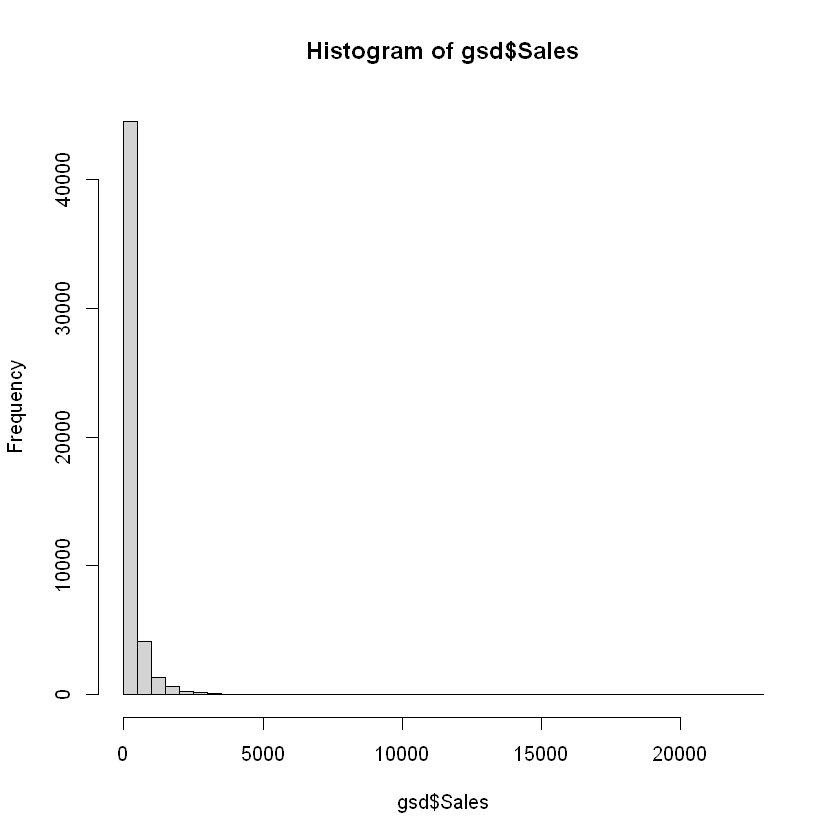

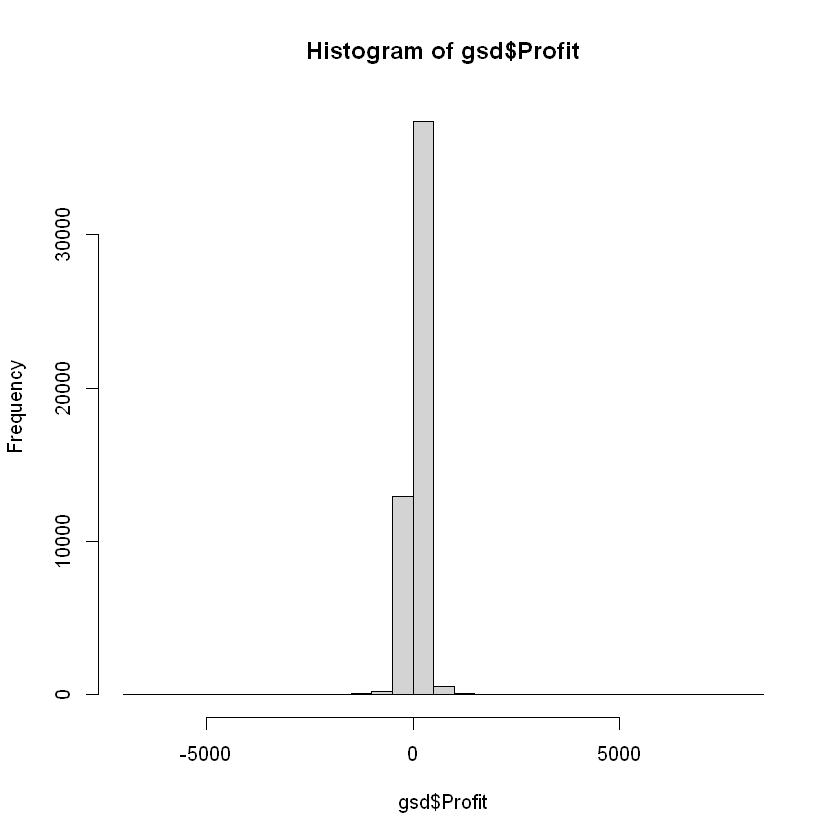

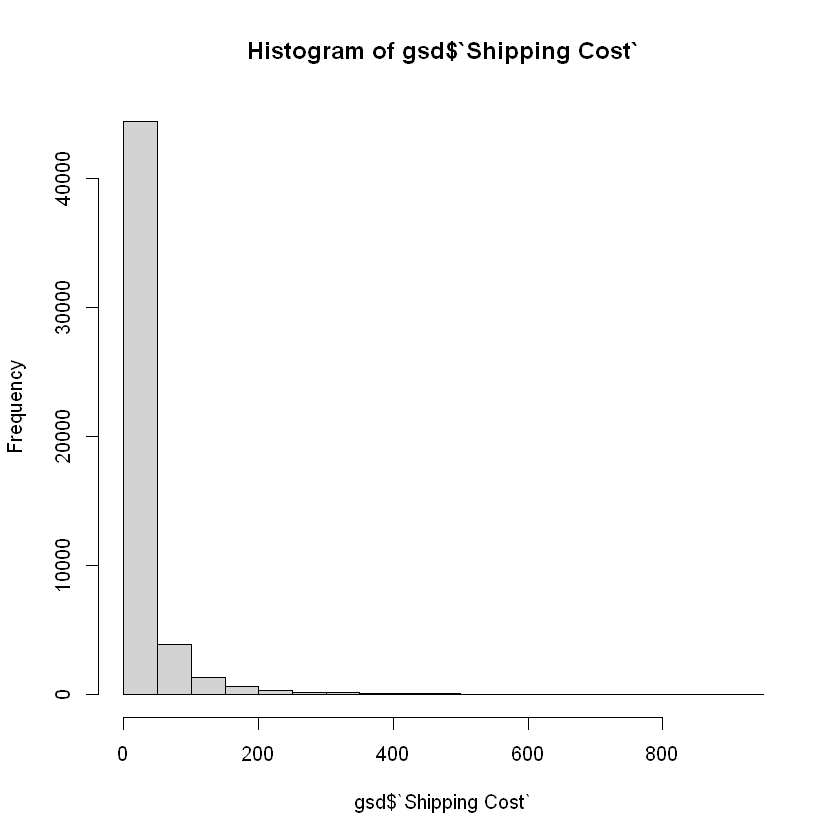

In [11]:
# Purpose: To visualize the shape of the distribution of numerical data, showing frequency within certain ranges (bins).
hist(gsd$Sales, breaks=50) 
hist(gsd$Profit, breaks=50)
hist(gsd$`Shipping Cost`, breaks=30)  

#### Boxplots

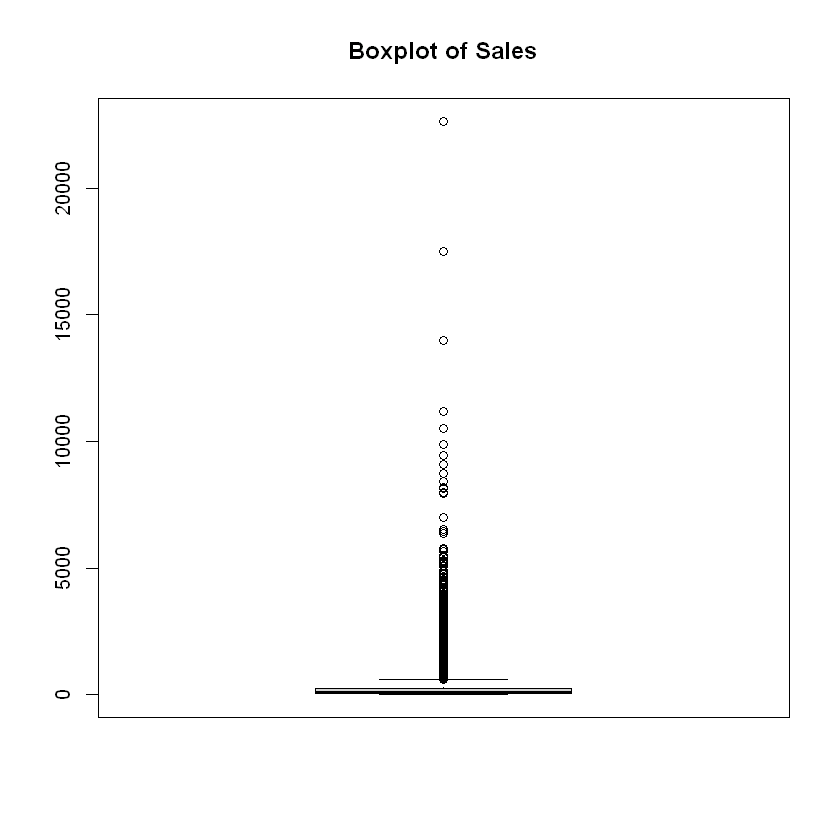

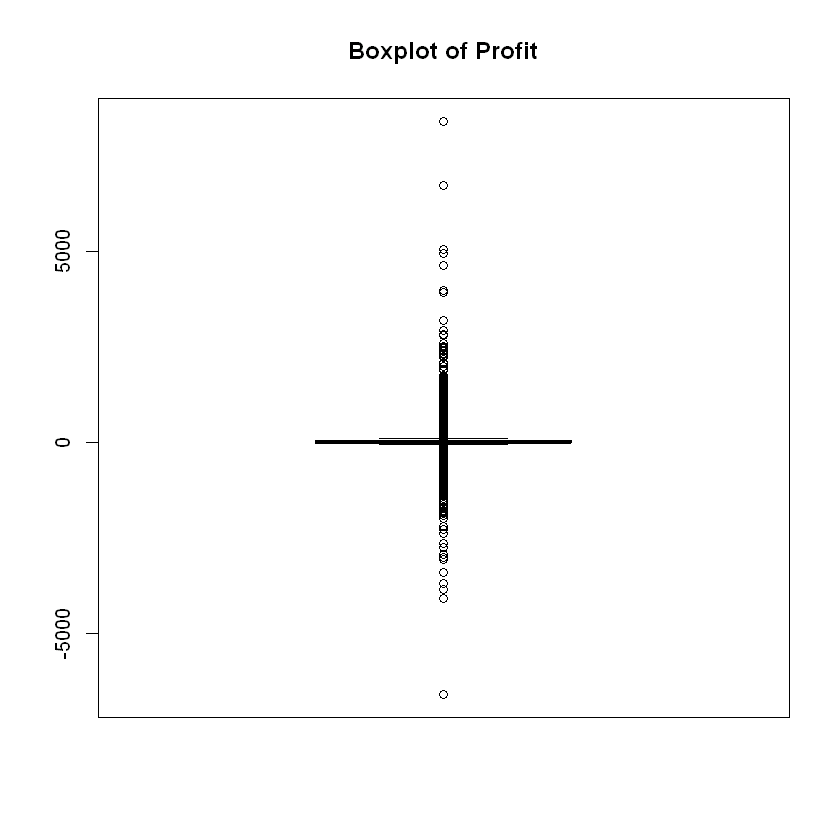

In [12]:
# Purpose: To summarize the distribution of numerical data, showing the median, quartiles, range, and potential outliers. Also excellent for comparing distributions across different categories.
boxplot(gsd$Sales, main="Boxplot of Sales")
boxplot(gsd$Profit, main="Boxplot of Profit")

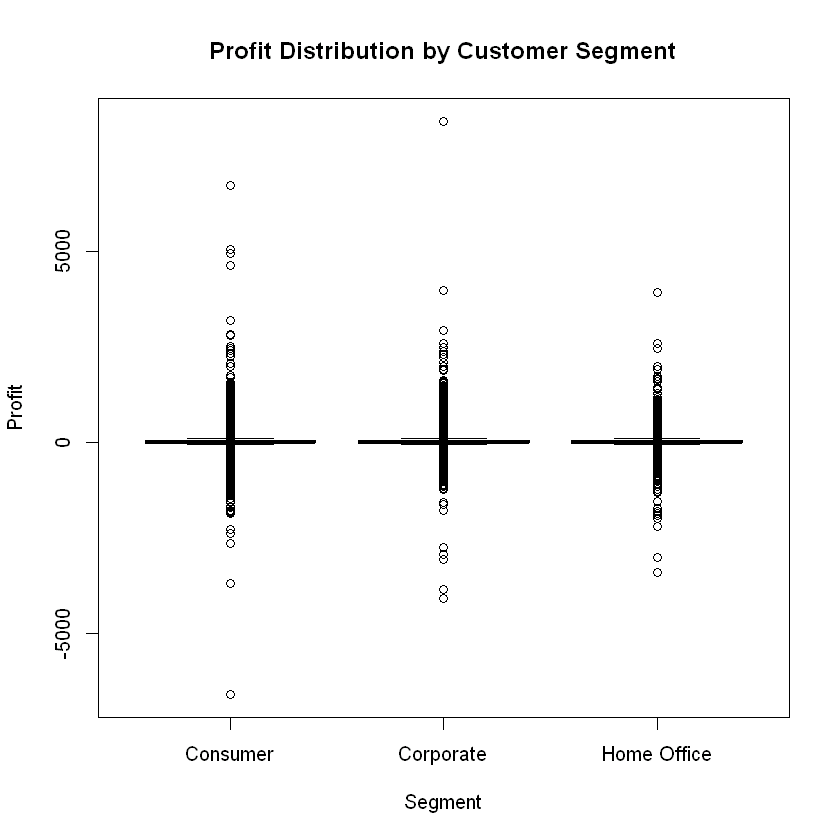

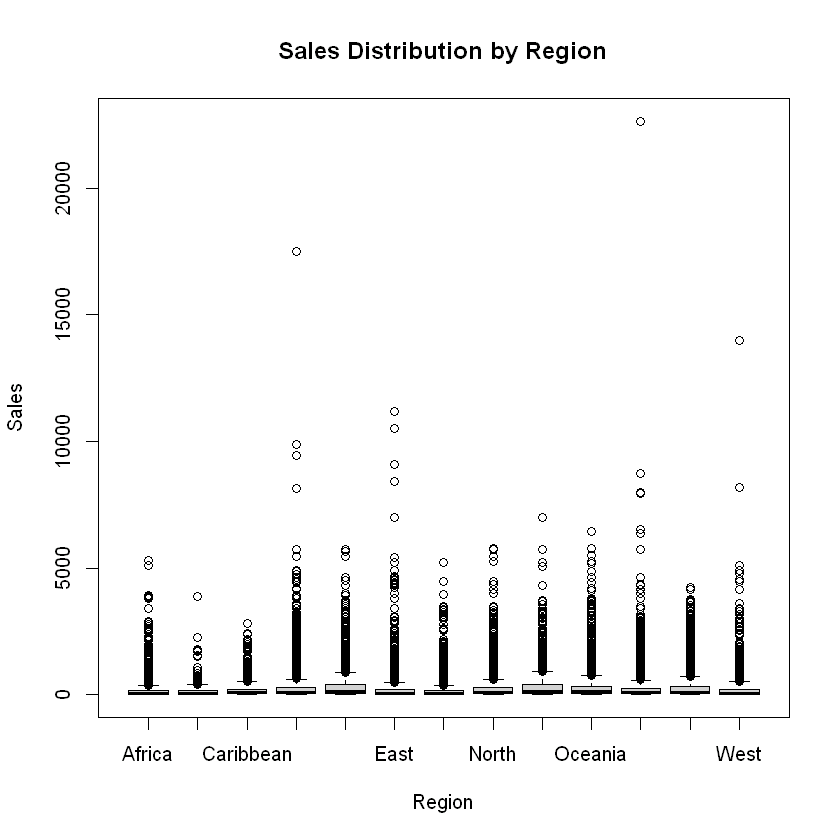

In [13]:
# compare a numerical variable across categories
boxplot(Profit ~ Segment, data = gsd, main="Profit Distribution by Customer Segment")
boxplot(Sales ~ Region, data = gsd, main="Sales Distribution by Region")

# Data Cleaning

### i. Check for duplicates

In [14]:
sum(duplicated(gsd))

[1] 0

### j. Check for missing values

In [15]:
colSums(is.na(gsd))

Row ID       Order ID     Order Date      Ship Date      Ship Mode 
             0              0              0              0              0 
   Customer ID  Customer Name        Segment           City          State 
             0              0              0              0              0 
       Country    Postal Code         Market         Region     Product ID 
             0          41296              0              0              0 
      Category   Sub-Category   Product Name          Sales       Quantity 
             0              0              0              0              0 
      Discount         Profit  Shipping Cost Order Priority 
             0              0              0              0

### k. Handle missing values

In [16]:
# Option A: Keep as-is (I am using this)
cat("Postal Code has", sum(is.na(gsd$`Postal Code`)), "missing values, keeping column as-is.\n")

Postal Code has 41296 missing values, keeping column as-is.


In [17]:
# Option B: Replace NAs with a placeholder (if needed for specific tasks)
gsd$`Postal Code`[is.na(gsd$`Postal Code`)] <- "Unknown"

In [18]:
# Option C: Drop rows with missing essential fields
gsd <- gsd %>% drop_na(`Postal Code`)

✍️ Justification:

The `Postal Code` column contains 41,296 missing values. Since it is not critical for our analysis (which focuses on countries, sales, and categories), I opted to retain the column without removing rows. This preserves the data integrity for global insights without affecting key analyses.

# Data Filtering

### l. Total number of countries

In [19]:
length(unique(gsd$Country))

[1] 147

### m. Select 5 countries for analysis

In [20]:
# Filter the dataset for selected countries
selected_countries <- c("United States", "India", "Germany", "China", "Australia")
gsd2 <- gsd %>% filter(Country %in% selected_countries)

In [21]:
# Convert Order Date and Ship Date to proper date formats
gsd2 <- gsd2 %>%
  mutate(
    `Order Date` = parse_date_time(as.character(`Order Date`), orders = c("mdy HMS", "mdy")),
    `Ship Date` = parse_date_time(as.character(`Ship Date`), orders = c("mdy HMS", "mdy")),
    Order_Month = floor_date(`Order Date`, "month"),
    Order_Month = as.Date(Order_Month) 
  )

# 2. Business Insights & Visualization

## 📊 Insight 1: Regional Sales & Discounting

### Total Sales & Avg Discount by Country

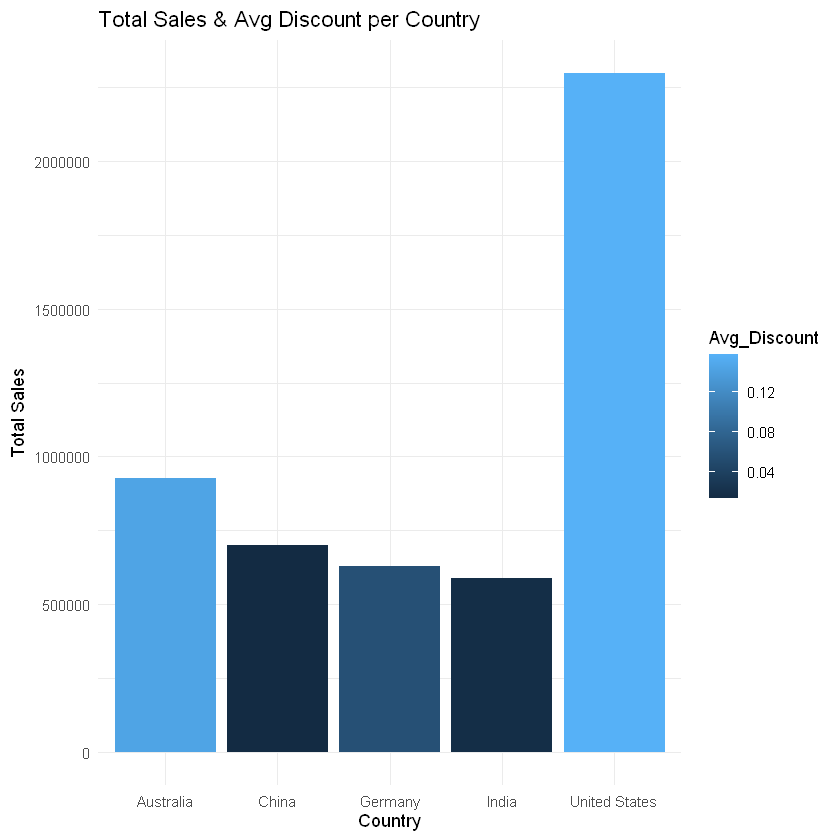

In [22]:
sales_discount <- gsd2 %>%
  group_by(Country) %>%
  summarise(
    Total_Sales = sum(Sales, na.rm = TRUE),
    Avg_Discount = mean(Discount, na.rm = TRUE)
  )

# Bar chart
ggplot(sales_discount, aes(x = Country, y = Total_Sales, fill = Avg_Discount)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Total Sales & Avg Discount per Country", y = "Total Sales")

### o. Discount vs Profitability

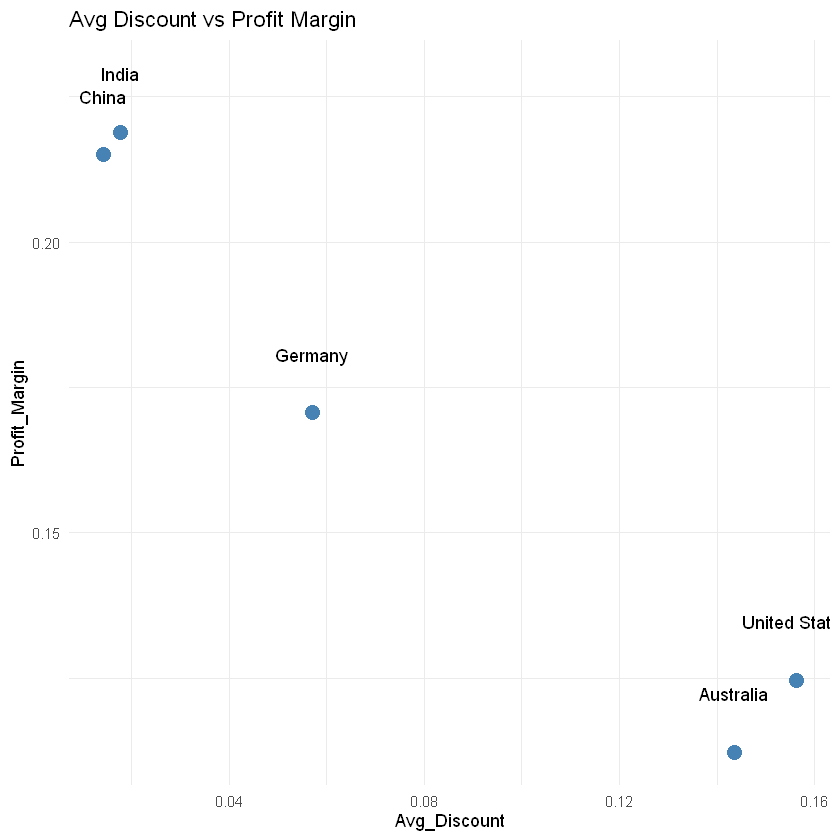

In [23]:
profit_margin <- gsd2 %>%
  group_by(Country) %>%
  summarise(
    Avg_Discount = mean(Discount, na.rm = TRUE),
    Profit_Margin = sum(Profit) / sum(Sales)
  )

# Scatter plot
ggplot(profit_margin, aes(x = Avg_Discount, y = Profit_Margin, label = Country)) +
  geom_point(size = 4, color = "steelblue") +
  geom_text(nudge_y = 0.01) +
  theme_minimal() +
  labs(title = "Avg Discount vs Profit Margin")

### p. ✍️ Business Insights & Recommendations

![image](images/image2.png)

## 📊 Insight 2: Category-Level Contribution

### q. Sales & Profit by Category

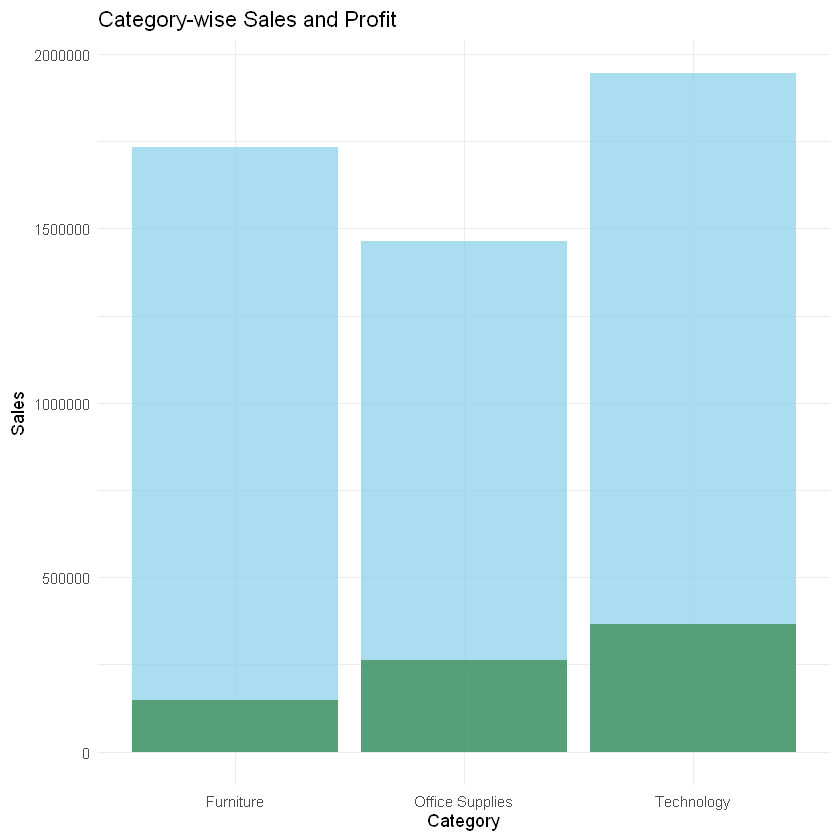

In [24]:
category_perf <- gsd2 %>%
  group_by(Category) %>%
  summarise(Sales = sum(Sales), Profit = sum(Profit))

# Bar chart
ggplot(category_perf, aes(x = Category)) +
  geom_bar(aes(y = Sales), stat = "identity", fill = "skyblue", alpha = 0.7) +
  geom_bar(aes(y = Profit), stat = "identity", fill = "darkgreen", alpha = 0.5) +
  theme_minimal() +
  labs(title = "Category-wise Sales and Profit")

### r. 3 Lowest Margin Sub-Categories in Top Category

In [25]:
colnames(gsd2)

[1] "Row ID"         "Order ID"       "Order Date"     "Ship Date"     
 [5] "Ship Mode"      "Customer ID"    "Customer Name"  "Segment"       
 [9] "City"           "State"          "Country"        "Postal Code"   
[13] "Market"         "Region"         "Product ID"     "Category"      
[17] "Sub-Category"   "Product Name"   "Sales"          "Quantity"      
[21] "Discount"       "Profit"         "Shipping Cost"  "Order Priority"
[25] "Order_Month"

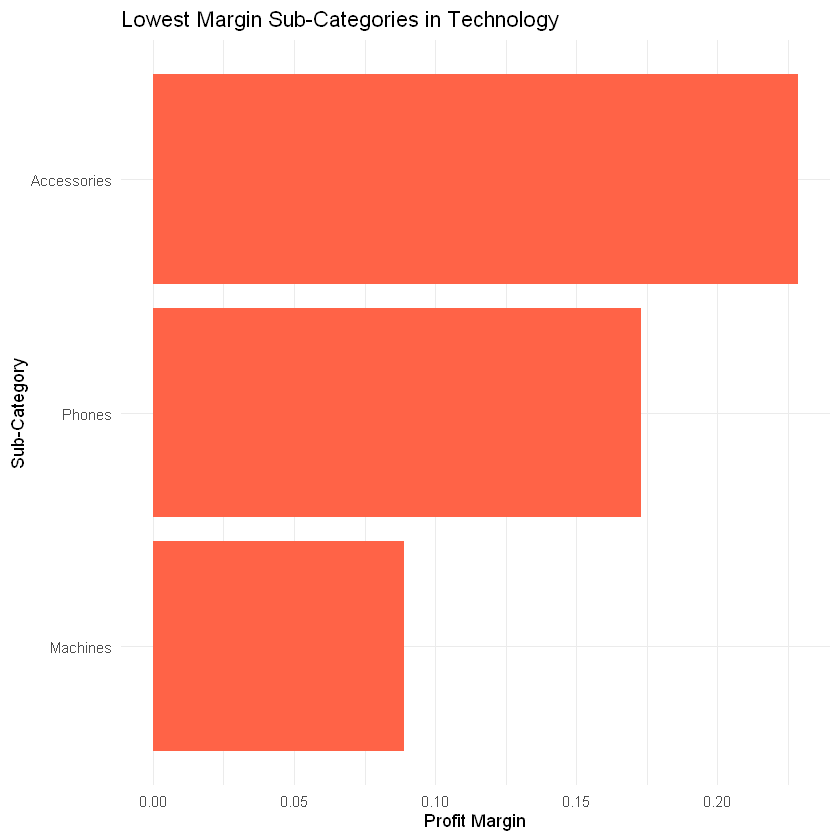

In [26]:
# Identify top category by total sales
top_category <- category_perf %>%
  arrange(desc(Sales)) %>%
  slice(1) %>%
  pull(Category)

# Get 3 sub-categories with lowest profit margins from the top category
low_margin_subs <- gsd2 %>%
  filter(Category == top_category) %>%
  group_by(`Sub-Category`) %>%
  summarise(
    Sales = sum(Sales),
    Profit = sum(Profit),
    Margin = Profit / Sales,
    .groups = "drop"
  ) %>%
  arrange(Margin) %>%
  slice(1:3)

# Bar chart: lowest margin sub-categories
ggplot(low_margin_subs, aes(x = reorder(`Sub-Category`, Margin), y = Margin)) +
  geom_col(fill = "tomato") +
  coord_flip() +
  labs(
    title = paste("Lowest Margin Sub-Categories in", top_category),
    x = "Sub-Category",
    y = "Profit Margin"
  ) +
  theme_minimal()


### s. ✍️ Business Insights

![image](images/image3.png)

## 📊 Insight 3: Temporal Trends

### t. Monthly Order Volume

# A tibble: 48 × 2
   Order_Month Orders
   <date>       <int>
 1 2011-01-01     122
 2 2011-02-01     111
 3 2011-03-01     254
 4 2011-04-01     208
 5 2011-05-01     221
 6 2011-06-01     285
 7 2011-07-01     202
 8 2011-08-01     320
 9 2011-09-01     460
10 2011-10-01     318
# ℹ 38 more rows


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


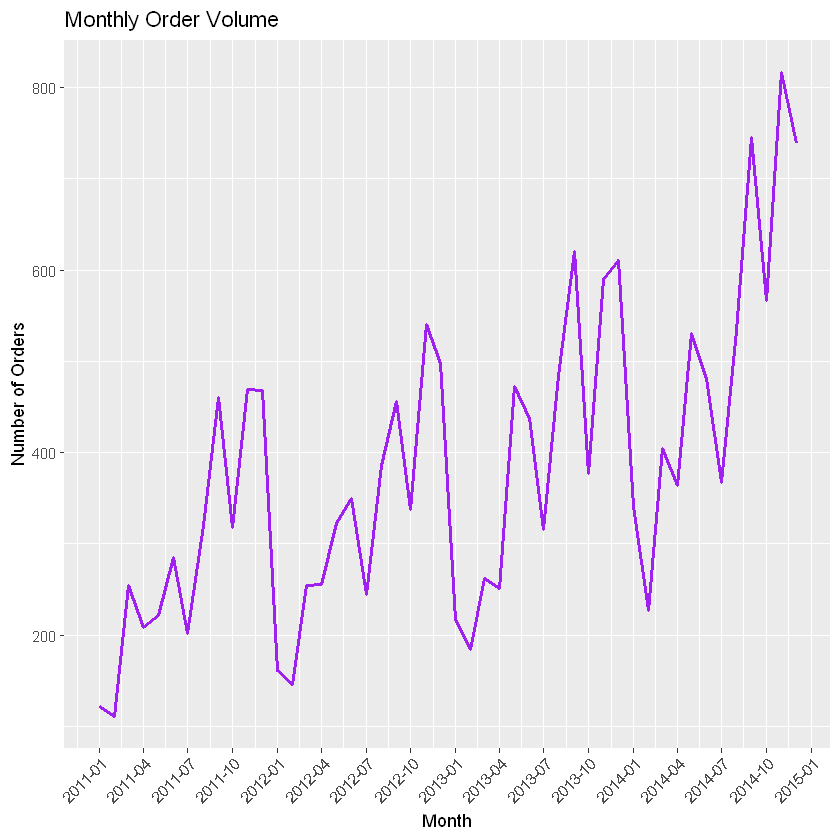

In [27]:
# Monthly order count summary
monthly_orders <- gsd2 %>%
  group_by(Order_Month) %>%
  summarise(Orders = n()) %>%
  arrange(Order_Month)

# Display summary table
print(monthly_orders)

# Plot
ggplot(monthly_orders, aes(x = Order_Month, y = Orders)) +
  geom_line(color = "purple", size = 1) +
  scale_x_date(date_labels = "%Y-%m", date_breaks = "3 months") +
  labs(title = "Monthly Order Volume", x = "Month", y = "Number of Orders") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### u. Monthly Profit Margins

# A tibble: 48 × 5
   Order_Month Monthly_Sales Monthly_Profit Orders Margin
   <date>              <dbl>          <dbl>  <int>  <dbl>
 1 2011-01-01         26921.          4632.    122 0.172 
 2 2011-02-01         23604.          4376.    111 0.185 
 3 2011-03-01         82024.          6185.    254 0.0754
 4 2011-04-01         49002.          8024.    208 0.164 
 5 2011-05-01         54993.          7309.    221 0.133 
 6 2011-06-01         88031.         14625.    285 0.166 
 7 2011-07-01         51411.           983.    202 0.0191
 8 2011-08-01         84874.         14635.    320 0.172 
 9 2011-09-01        146603.         19598.    460 0.134 
10 2011-10-01         88578.         14056.    318 0.159 
# ℹ 38 more rows


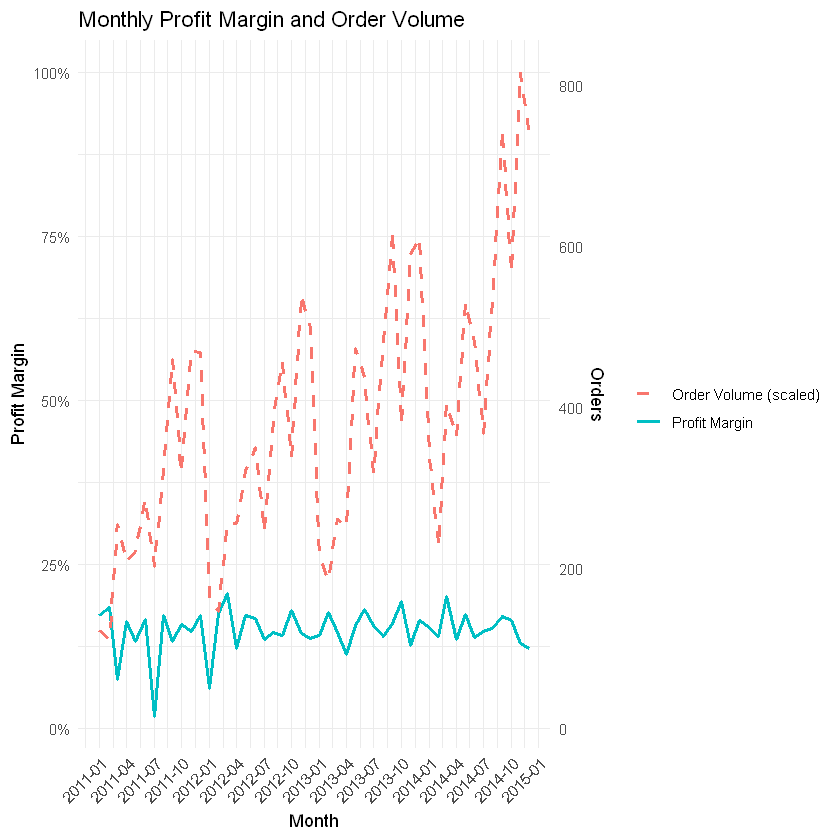

In [28]:
# Combine with margin data
monthly_margin <- gsd2 %>%
  group_by(Order_Month) %>%
  summarise(
    Monthly_Sales = sum(Sales),
    Monthly_Profit = sum(Profit),
    Orders = n(),
    Margin = Monthly_Profit / Monthly_Sales
  ) %>%
  arrange(Order_Month)

# Display summary table
print(monthly_margin)

# Plot with overlaid lines
ggplot(monthly_margin, aes(x = Order_Month)) +
  geom_line(aes(y = Margin, color = "Profit Margin"), size = 1) +
  geom_line(aes(y = Orders / max(Orders), color = "Order Volume (scaled)"), size = 1, linetype = "dashed") +
  scale_y_continuous(labels = percent_format(), sec.axis = sec_axis(~ . * max(monthly_margin$Orders), name = "Orders")) +
  scale_x_date(date_labels = "%Y-%m", date_breaks = "3 months") +
  labs(title = "Monthly Profit Margin and Order Volume",
       x = "Month",
       y = "Profit Margin",
       color = "") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

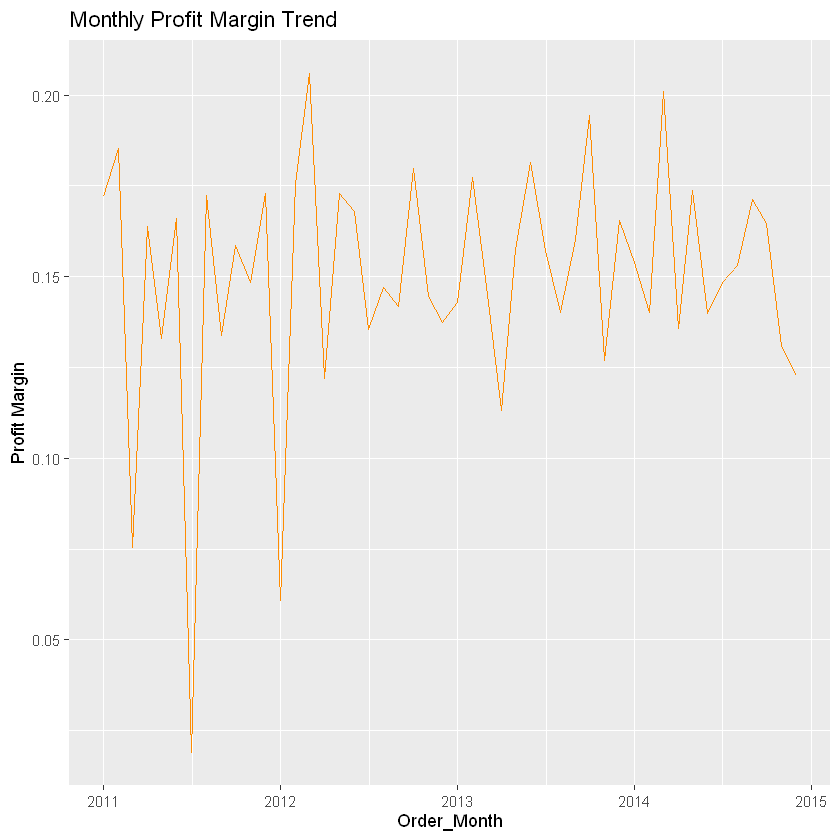

In [29]:
monthly_margin <- gsd2 %>%
  group_by(Order_Month) %>%
  summarise(
    Monthly_Sales = sum(Sales),
    Monthly_Profit = sum(Profit),
    Margin = Monthly_Profit / Monthly_Sales
  )

ggplot(monthly_margin, aes(x = Order_Month, y = Margin)) +
  geom_line(color = "darkorange") +
  labs(title = "Monthly Profit Margin Trend", y = "Profit Margin")

### v. ✍️ Insights & Recommendations

![image](images/image4.png)

In [ ]:
# ggsave("monthly_orders.png") # to export charts

Saving 7 x 7 in image
